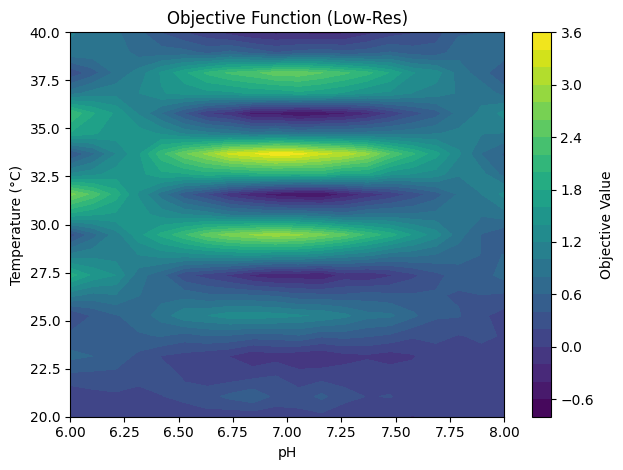

In [1]:
import torch
import matplotlib.pyplot as plt

bounds = torch.tensor([[6.0, 20.0], [8.0, 40.0]], dtype=torch.double)
'''
def objective_function(X, pHopt=7, temp_opt=35, a=100, b=1, c=1):
    pH, temp = X[:, 0], X[:, 1]
    return a - b * (pH - pHopt)**2 - c * (temp - temp_opt)**2


'''

#=============================

# pH_opt, temp_opt, a, b, c = 7, 35, 100, 1, 1 # a = 100
pH_opt,pH_opt2, temp_opt,temp_opt2 = 7, 5.5, 35, 30 # a = 100
# Simulate an objective function for generating data (you can change this for your real function)
#IF YOU HAVE A MECHANISTIC MODEL YOU COULD USE THAT?
def objective_function(X,pHopt =7,pHopt2 =5.5,temp_opt = 35,temp_opt2 = 30, a = 100, b = 1, c = 1):
    pH, temp = X[:, 0], X[:, 1]

    # First peak at (pH=7, temp=35)
    pH_term1 = torch.exp(-0.5 * ((pH - pHopt) / 1.5)**2)  # Gaussian term for pH with width 1.5
    temp_term1 = torch.exp(-0.5 * ((temp - temp_opt) / 5.0)**2)  # Gaussian term for temp with width 5.0

    # Second peak at (pH=5.5, temp=30)
    pH_term2 = torch.exp(-0.5 * ((pH - pHopt2) / 1.5)**2)
    temp_term2 = torch.exp(-0.5 * ((temp - temp_opt2) / 5.0)**2)

    
    # Stronger Sinusoidal Modulation
    sin_component = torch.sin(2 * pH) * torch.cos(1.5 * temp)  # Higher frequency
    wave_strength = 1.5  # Scale up the wave effect

    # Combine the two peaks with the stronger sinusoidal variation
    y = (pH_term1 * temp_term1 + pH_term2 * temp_term2) * (1 + wave_strength * sin_component)

    return y + 0.05 * torch.randn_like(y)  # Add some noise to simulate measurement errors

ph_vals = torch.linspace(bounds[0, 0], bounds[1, 0], 20)
temp_vals = torch.linspace(bounds[0, 1], bounds[1, 1], 20)
PH, TEMP = torch.meshgrid(ph_vals, temp_vals, indexing='ij')
grid = torch.stack([PH.reshape(-1), TEMP.reshape(-1)], dim=-1)

Z = objective_function(grid).reshape(20, 20)

plt.contourf(PH.numpy(), TEMP.numpy(), Z.numpy(), levels=20, cmap='viridis')
plt.colorbar(label='Objective Value')
plt.xlabel('pH')
plt.ylabel('Temperature (°C)')
plt.title('Objective Function (Low-Res)')
plt.tight_layout()
plt.show()